In [41]:
import pandas as pd

houses = pd.read_csv("housing.csv")

print(houses)

       longitude  latitude  ...  median_house_value  ocean_proximity
0        -122.23     37.88  ...            452600.0         NEAR BAY
1        -122.22     37.86  ...            358500.0         NEAR BAY
2        -122.24     37.85  ...            352100.0         NEAR BAY
3        -122.25     37.85  ...            341300.0         NEAR BAY
4        -122.25     37.85  ...            342200.0         NEAR BAY
...          ...       ...  ...                 ...              ...
20635    -121.09     39.48  ...             78100.0           INLAND
20636    -121.21     39.49  ...             77100.0           INLAND
20637    -121.22     39.43  ...             92300.0           INLAND
20638    -121.32     39.43  ...             84700.0           INLAND
20639    -121.24     39.37  ...             89400.0           INLAND

[20640 rows x 10 columns]


In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [44]:
houses.dropna(inplace = True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [45]:
from sklearn.model_selection import train_test_split

X = houses.drop(['median_house_value'], axis = 1)
y = houses['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

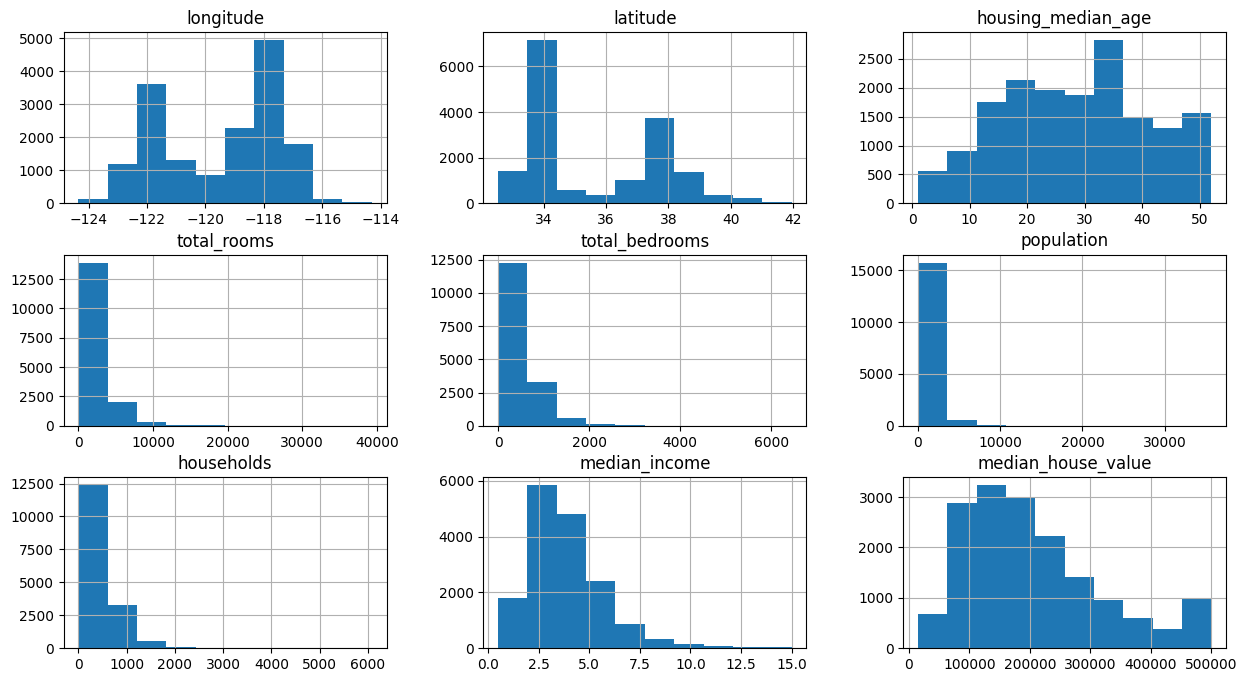

In [46]:
train_data = X_train.join(y_train)
train_data.hist(figsize=(15,8))

In [47]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

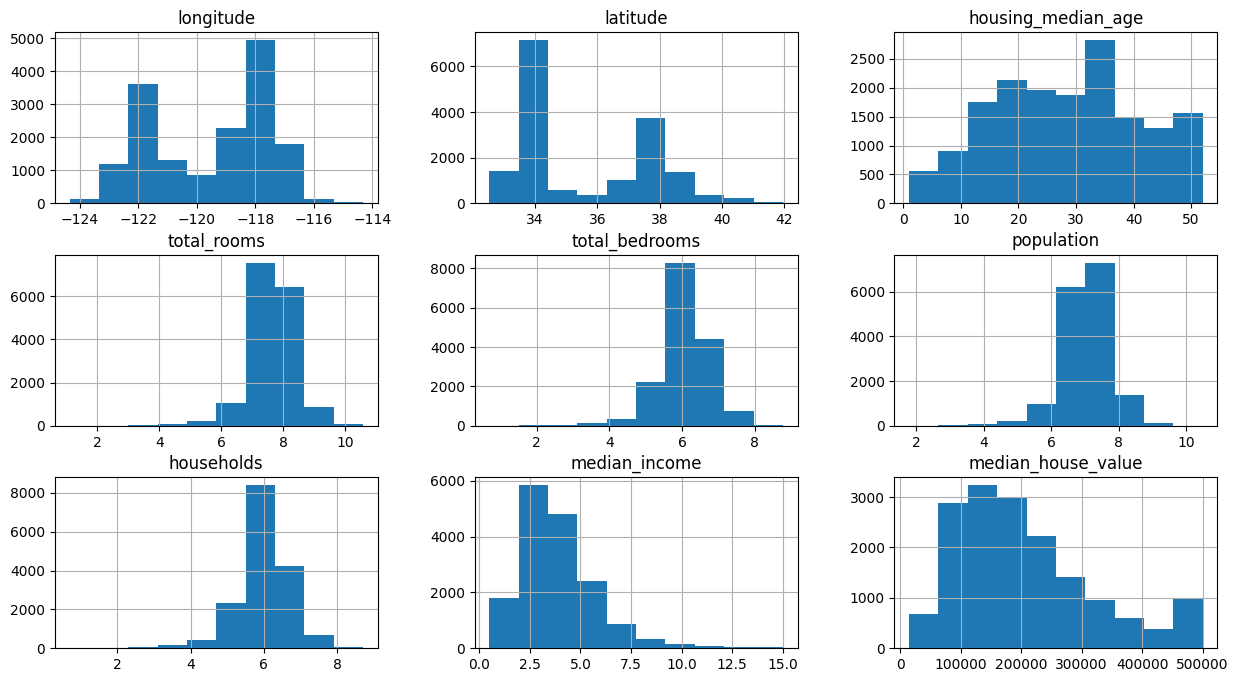

In [48]:
train_data.hist(figsize=(15,8))

In [49]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7258
INLAND        5209
NEAR OCEAN    2088
NEAR BAY      1787
ISLAND           4
Name: count, dtype: int64

In [50]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis = 1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13675,-117.27,34.06,20.0,8.567696,7.323171,8.237744,7.247793,2.0250,85700.0,0,1,0,0,0
12009,-117.55,33.92,24.0,7.940228,6.218600,7.410952,6.234411,4.8167,163300.0,0,1,0,0,0
111,-122.25,37.82,32.0,8.245384,7.002156,7.499423,6.930495,2.6429,218500.0,0,0,0,1,0
5229,-118.24,33.94,34.0,6.680855,5.198497,6.513230,4.976734,2.0769,88300.0,1,0,0,0,0
6929,-118.08,34.01,34.0,7.557473,6.309918,7.660585,6.272877,2.5969,150200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,-122.07,37.91,33.0,7.346655,5.627621,6.459904,5.541264,3.6833,292500.0,0,0,0,1,0
7517,-118.25,33.90,36.0,7.035269,5.446737,6.421622,5.429346,2.5521,113100.0,1,0,0,0,0
16359,-121.31,37.99,23.0,8.050703,6.562444,7.409136,6.523562,1.8860,105300.0,0,1,0,0,0
20410,-118.86,34.19,26.0,8.050703,6.175867,7.296413,6.129050,6.1949,243500.0,1,0,0,0,0


<Axes: xlabel='latitude', ylabel='longitude'>

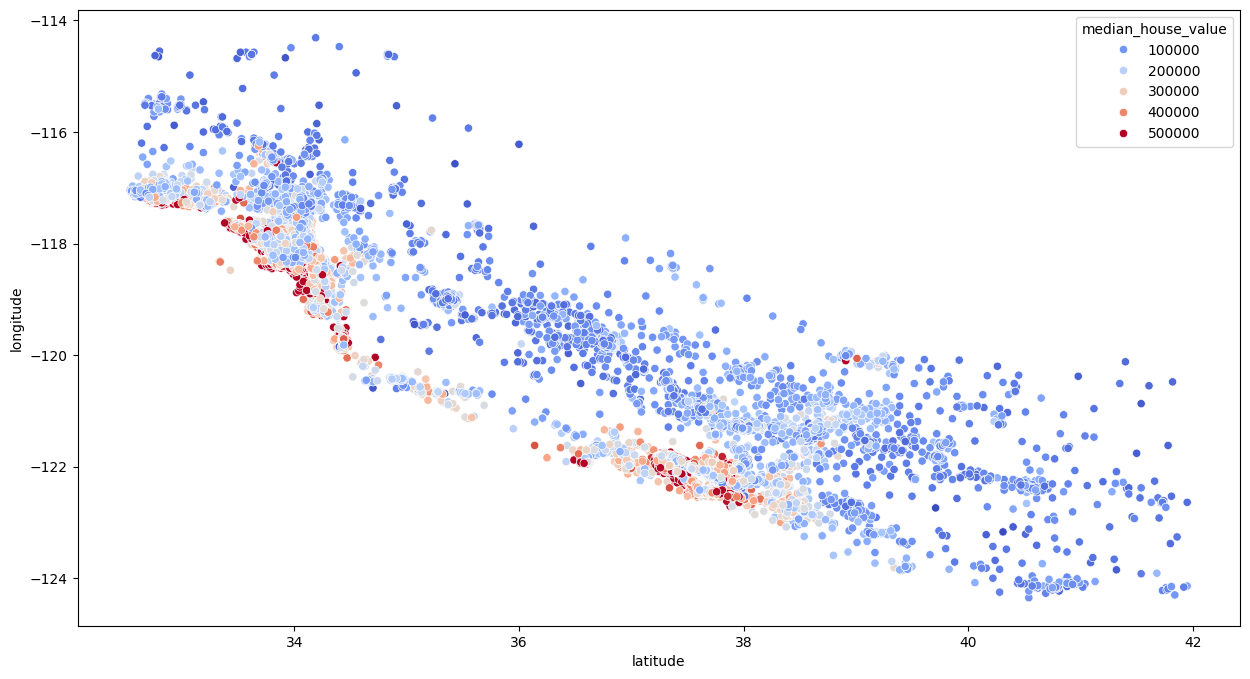

In [53]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y = "longitude", data = train_data, hue = "median_house_value", palette="coolwarm")

In [55]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(["median_house_value"], axis = 1), train_data["median_house_value"]

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [57]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis = 1)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13675,-117.27,34.06,20.0,8.567696,7.323171,8.237744,7.247793,2.0250,85700.0,0,1,0,0,0
12009,-117.55,33.92,24.0,7.940228,6.218600,7.410952,6.234411,4.8167,163300.0,0,1,0,0,0
111,-122.25,37.82,32.0,8.245384,7.002156,7.499423,6.930495,2.6429,218500.0,0,0,0,1,0
5229,-118.24,33.94,34.0,6.680855,5.198497,6.513230,4.976734,2.0769,88300.0,1,0,0,0,0
6929,-118.08,34.01,34.0,7.557473,6.309918,7.660585,6.272877,2.5969,150200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,-122.07,37.91,33.0,7.346655,5.627621,6.459904,5.541264,3.6833,292500.0,0,0,0,1,0
7517,-118.25,33.90,36.0,7.035269,5.446737,6.421622,5.429346,2.5521,113100.0,1,0,0,0,0
16359,-121.31,37.99,23.0,8.050703,6.562444,7.409136,6.523562,1.8860,105300.0,0,1,0,0,0
20410,-118.86,34.19,26.0,8.050703,6.175867,7.296413,6.129050,6.1949,243500.0,1,0,0,0,0


In [58]:
X_test, Y_test = test_data.drop(["median_house_value"], axis = 1), test_data["median_house_value"]


In [59]:
reg.score(X_test, y_test)

0.6637569148210649

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
forest.score(X_test, y_test)

0.8161432347643921